In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt
%matplotlib inline

[Learn about tonight's data](https://data.cityofchicago.org/Public-Safety/Strategic-Subject-List/4aki-r3np/about)

In [2]:
df = pd.read_csv("../../assets/Strategic_Subject_List.csv", low_memory=False)

In [3]:
df.head()

SSL SCORE PREDICTOR RAT AGE AT LATEST ARREST  \
0        500                              20-30   
1        500                              20-30   
2        500                       less than 20   
3        500                       less than 20   
4        500                       less than 20   

   PREDICTOR RAT VICTIM SHOOTING INCIDENTS  \
0                                        0   
1                                        0   
2                                        1   
3                                        1   
4                                        0   

   PREDICTOR RAT VICTIM BATTERY OR ASSAULT  \
0                                        1   
1                                        9   
2                                        2   
3                                        1   
4                                        0   

   PREDICTOR RAT ARRESTS VIOLENT OFFENSES  PREDICTOR RAT GANG AFFILIATION  \
0                                       4                               1   
1                                       1                               1   
2                                       1                               1   
3                                       4                               1   
4                                       5                               0   

   PREDICTOR RAT NARCOTIC ARRESTS  PREDICTOR RAT TREND IN CRIMINAL ACTIVITY  \
0                               1                                     1.000   
1                               0                                     1.000   
2                               3                                     1.000   
3                               0                                     1.600   
4                               0                                     1.300   

   PREDICTOR RAT UUW ARRESTS SEX CODE CD RACE CODE CD WEAPON I DRUG I  \
0                          1           M          BLK        Y      N   
1                          0           M          WHI        N      N   
2                          0           M          WHI        N      N   
3                          1           M          BLK        Y      N   
4                          3           M          BLK        Y      N   

      AGE GROUP        AGE TO  STOP ORDER NO PAROLEE I  LATEST DATE  \
0         20-30         20-30            nan       NaN         2015   
1         20-30         20-30            nan       NaN         2016   
2  less than 20  less than 20            nan       NaN         2016   
3  less than 20  less than 20            nan       NaN         2016   
4  less than 20  less than 20            nan       NaN         2016   

   LATEST DIST  MAJORITY DIST DLST  LATEST DIST RES  WEAPONS ARR CNT  \
0           31         24.000  NaN               31            1.000   
1           31          8.000  NaN                8              nan   
2           31          8.000  NaN                8              nan   
3           31          3.000  NaN                4            2.000   
4           31         20.000  NaN               31            1.000   

   LATEST WEAPON ARR DATE  NARCOTICS ARR CNT  LATEST NARCOTIC ARR DATE  \
0                2012.000                nan                       nan   
1                     nan                nan                       nan   
2                     nan                nan                       nan   
3                2016.000                nan                       nan   
4                2016.000                nan                       nan   

  IDOC RES CITY IDOC RES STATE CODE  IDOC RES ZIP CODE  IDOC CPD DIST  \
0        SKOKIE                  IL          60077.000            nan   
1           NaN                 NaN                nan            nan   
2           NaN                 NaN                nan            nan   
3           NaN                 NaN                nan            nan   
4           NaN                 NaN                nan            nan   

  CPD ARREST I  DOMES

In [4]:
#How many records are in the data?
len(df)

398684

In [26]:
#Which predictors/variables are missing values?
df.isnull().sum()

SSL SCORE                                        0
PREDICTOR RAT AGE AT LATEST ARREST             102
PREDICTOR RAT VICTIM SHOOTING INCIDENTS          0
PREDICTOR RAT VICTIM BATTERY OR ASSAULT          0
PREDICTOR RAT ARRESTS VIOLENT OFFENSES           0
PREDICTOR RAT GANG AFFILIATION                   0
PREDICTOR RAT NARCOTIC ARRESTS                   0
PREDICTOR RAT TREND IN CRIMINAL ACTIVITY         0
PREDICTOR RAT UUW ARRESTS                        0
SEX CODE CD                                      0
RACE CODE CD                                     0
WEAPON I                                         0
DRUG I                                           0
AGE GROUP                                      153
AGE TO                                         153
STOP ORDER NO                               397027
PAROLEE I                                   385600
LATEST DATE                                      0
LATEST DIST                                      0
MAJORITY DIST                  

In [7]:
# lets take a look at some of the missing values
df[(df["STOP ORDER NO"].isnull())].head()

SSL SCORE PREDICTOR RAT AGE AT LATEST ARREST  \
0        500                              20-30   
1        500                              20-30   
2        500                       less than 20   
3        500                       less than 20   
4        500                       less than 20   

   PREDICTOR RAT VICTIM SHOOTING INCIDENTS  \
0                                        0   
1                                        0   
2                                        1   
3                                        1   
4                                        0   

   PREDICTOR RAT VICTIM BATTERY OR ASSAULT  \
0                                        1   
1                                        9   
2                                        2   
3                                        1   
4                                        0   

   PREDICTOR RAT ARRESTS VIOLENT OFFENSES  PREDICTOR RAT GANG AFFILIATION  \
0                                       4                               1   
1                                       1                               1   
2                                       1                               1   
3                                       4                               1   
4                                       5                               0   

   PREDICTOR RAT NARCOTIC ARRESTS  PREDICTOR RAT TREND IN CRIMINAL ACTIVITY  \
0                               1                                     1.000   
1                               0                                     1.000   
2                               3                                     1.000   
3                               0                                     1.600   
4                               0                                     1.300   

   PREDICTOR RAT UUW ARRESTS SEX CODE CD RACE CODE CD WEAPON I DRUG I  \
0                          1           M          BLK        Y      N   
1                          0           M          WHI        N      N   
2                          0           M          WHI        N      N   
3                          1           M          BLK        Y      N   
4                          3           M          BLK        Y      N   

      AGE GROUP        AGE TO  STOP ORDER NO PAROLEE I  LATEST DATE  \
0         20-30         20-30            nan       NaN         2015   
1         20-30         20-30            nan       NaN         2016   
2  less than 20  less than 20            nan       NaN         2016   
3  less than 20  less than 20            nan       NaN         2016   
4  less than 20  less than 20            nan       NaN         2016   

   LATEST DIST  MAJORITY DIST DLST  LATEST DIST RES  WEAPONS ARR CNT  \
0           31         24.000  NaN               31            1.000   
1           31          8.000  NaN                8              nan   
2           31          8.000  NaN                8              nan   
3           31          3.000  NaN                4            2.000   
4           31         20.000  NaN               31            1.000   

   LATEST WEAPON ARR DATE  NARCOTICS ARR CNT  LATEST NARCOTIC ARR DATE  \
0                2012.000                nan                       nan   
1                     nan                nan                       nan   
2                     nan                nan                       nan   
3                2016.000                nan                       nan   
4                2016.000                nan                       nan   

  IDOC RES CITY IDOC RES STATE CODE  IDOC RES ZIP CODE  IDOC CPD DIST  \
0        SKOKIE                  IL          60077.000            nan   
1           NaN                 NaN                nan            nan   
2           NaN                 NaN                nan            nan   
3           NaN                 NaN                nan            nan   
4           NaN                 NaN                nan            nan   

  CPD ARREST I  DOMES

In [27]:
#let's drop columns we don't need. There are a variety of ways to do this. 
df.columns

Index(['SSL SCORE', 'PREDICTOR RAT AGE AT LATEST ARREST',
       'PREDICTOR RAT VICTIM SHOOTING INCIDENTS',
       'PREDICTOR RAT VICTIM BATTERY OR ASSAULT',
       'PREDICTOR RAT ARRESTS VIOLENT OFFENSES',
       'PREDICTOR RAT GANG AFFILIATION', 'PREDICTOR RAT NARCOTIC ARRESTS',
       'PREDICTOR RAT TREND IN CRIMINAL ACTIVITY', 'PREDICTOR RAT UUW ARRESTS',
       'SEX CODE CD', 'RACE CODE CD', 'WEAPON I', 'DRUG I', 'AGE GROUP',
       'AGE TO', 'STOP ORDER NO', 'PAROLEE I', 'LATEST DATE', 'LATEST DIST',
       'MAJORITY DIST', 'DLST', 'LATEST DIST RES', 'WEAPONS ARR CNT',
       'LATEST WEAPON ARR DATE', 'NARCOTICS ARR CNT',
       'LATEST NARCOTIC ARR DATE', 'IDOC RES CITY', 'IDOC RES STATE CODE',
       'IDOC RES ZIP CODE', 'IDOC CPD DIST', 'CPD ARREST I',
       'DOMESTIC ARR CNT', 'LATEST DOMESTIC ARR DATE', 'AGE CURR',
       'SSL LAST PTV DATE', 'TRAP STATUS', 'RAW SSL SCORE', 'HEAT SCORE',
       'RAW_HEAT_SCORE', 'STATUS I', 'PRE RAW HEAT SCORE', 'TRAP FLAGS',
       'SSL FL

In [28]:
# way #1 
s = df.pop("STOP ORDER NO")

In [29]:
df.columns 
#notice Stop order no is gone

Index(['SSL SCORE', 'PREDICTOR RAT AGE AT LATEST ARREST',
       'PREDICTOR RAT VICTIM SHOOTING INCIDENTS',
       'PREDICTOR RAT VICTIM BATTERY OR ASSAULT',
       'PREDICTOR RAT ARRESTS VIOLENT OFFENSES',
       'PREDICTOR RAT GANG AFFILIATION', 'PREDICTOR RAT NARCOTIC ARRESTS',
       'PREDICTOR RAT TREND IN CRIMINAL ACTIVITY', 'PREDICTOR RAT UUW ARRESTS',
       'SEX CODE CD', 'RACE CODE CD', 'WEAPON I', 'DRUG I', 'AGE GROUP',
       'AGE TO', 'PAROLEE I', 'LATEST DATE', 'LATEST DIST', 'MAJORITY DIST',
       'DLST', 'LATEST DIST RES', 'WEAPONS ARR CNT', 'LATEST WEAPON ARR DATE',
       'NARCOTICS ARR CNT', 'LATEST NARCOTIC ARR DATE', 'IDOC RES CITY',
       'IDOC RES STATE CODE', 'IDOC RES ZIP CODE', 'IDOC CPD DIST',
       'CPD ARREST I', 'DOMESTIC ARR CNT', 'LATEST DOMESTIC ARR DATE',
       'AGE CURR', 'SSL LAST PTV DATE', 'TRAP STATUS', 'RAW SSL SCORE',
       'HEAT SCORE', 'RAW_HEAT_SCORE', 'STATUS I', 'PRE RAW HEAT SCORE',
       'TRAP FLAGS', 'SSL FLAGS', 'LATITUDE', 'LONGI

In [30]:
#alternatively you can use drop
df.drop('LATITUDE', axis=1, inplace=True)
df.columns

Index(['SSL SCORE', 'PREDICTOR RAT AGE AT LATEST ARREST',
       'PREDICTOR RAT VICTIM SHOOTING INCIDENTS',
       'PREDICTOR RAT VICTIM BATTERY OR ASSAULT',
       'PREDICTOR RAT ARRESTS VIOLENT OFFENSES',
       'PREDICTOR RAT GANG AFFILIATION', 'PREDICTOR RAT NARCOTIC ARRESTS',
       'PREDICTOR RAT TREND IN CRIMINAL ACTIVITY', 'PREDICTOR RAT UUW ARRESTS',
       'SEX CODE CD', 'RACE CODE CD', 'WEAPON I', 'DRUG I', 'AGE GROUP',
       'AGE TO', 'PAROLEE I', 'LATEST DATE', 'LATEST DIST', 'MAJORITY DIST',
       'DLST', 'LATEST DIST RES', 'WEAPONS ARR CNT', 'LATEST WEAPON ARR DATE',
       'NARCOTICS ARR CNT', 'LATEST NARCOTIC ARR DATE', 'IDOC RES CITY',
       'IDOC RES STATE CODE', 'IDOC RES ZIP CODE', 'IDOC CPD DIST',
       'CPD ARREST I', 'DOMESTIC ARR CNT', 'LATEST DOMESTIC ARR DATE',
       'AGE CURR', 'SSL LAST PTV DATE', 'TRAP STATUS', 'RAW SSL SCORE',
       'HEAT SCORE', 'RAW_HEAT_SCORE', 'STATUS I', 'PRE RAW HEAT SCORE',
       'TRAP FLAGS', 'SSL FLAGS', 'LONGITUDE', 'CENS

In [31]:
# Now let's drop multiple columns at once 
df.drop(["WEAPONS ARR CNT", "LATEST WEAPON ARR DATE"], axis=1, inplace=True)
df.columns

Index(['SSL SCORE', 'PREDICTOR RAT AGE AT LATEST ARREST',
       'PREDICTOR RAT VICTIM SHOOTING INCIDENTS',
       'PREDICTOR RAT VICTIM BATTERY OR ASSAULT',
       'PREDICTOR RAT ARRESTS VIOLENT OFFENSES',
       'PREDICTOR RAT GANG AFFILIATION', 'PREDICTOR RAT NARCOTIC ARRESTS',
       'PREDICTOR RAT TREND IN CRIMINAL ACTIVITY', 'PREDICTOR RAT UUW ARRESTS',
       'SEX CODE CD', 'RACE CODE CD', 'WEAPON I', 'DRUG I', 'AGE GROUP',
       'AGE TO', 'PAROLEE I', 'LATEST DATE', 'LATEST DIST', 'MAJORITY DIST',
       'DLST', 'LATEST DIST RES', 'NARCOTICS ARR CNT',
       'LATEST NARCOTIC ARR DATE', 'IDOC RES CITY', 'IDOC RES STATE CODE',
       'IDOC RES ZIP CODE', 'IDOC CPD DIST', 'CPD ARREST I',
       'DOMESTIC ARR CNT', 'LATEST DOMESTIC ARR DATE', 'AGE CURR',
       'SSL LAST PTV DATE', 'TRAP STATUS', 'RAW SSL SCORE', 'HEAT SCORE',
       'RAW_HEAT_SCORE', 'STATUS I', 'PRE RAW HEAT SCORE', 'TRAP FLAGS',
       'SSL FLAGS', 'LONGITUDE', 'CENSUS TRACT', 'COMMUNITY AREA', 'LOCATION'],
   

In [32]:
#sometimes it's faster just to keep the columns you need 
df= df[["SSL SCORE", "SEX CODE CD", "RACE CODE CD", "PREDICTOR RAT AGE AT LATEST ARREST", "IDOC RES CITY"]]
df.head()

SSL SCORE SEX CODE CD RACE CODE CD PREDICTOR RAT AGE AT LATEST ARREST  \
0        500           M          BLK                              20-30   
1        500           M          WHI                              20-30   
2        500           M          WHI                       less than 20   
3        500           M          BLK                       less than 20   
4        500           M          BLK                       less than 20   

  IDOC RES CITY  
0        SKOKIE  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [33]:
#What is the average SSL score?
#What is the minimum SSL score?
#What is the maximum SSL score?

df["SSL SCORE"].describe()

count   398684.000
mean       279.840
std         57.996
min         10.000
25%        242.000
50%        289.000
75%        322.000
max        500.000
Name: SSL SCORE, dtype: float64

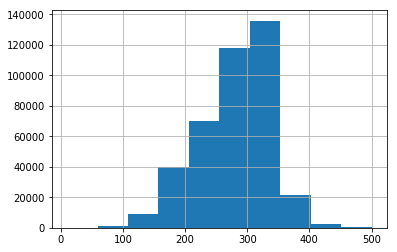

In [34]:
#What is the distribution of the SSL scores?

df["SSL SCORE"].hist()

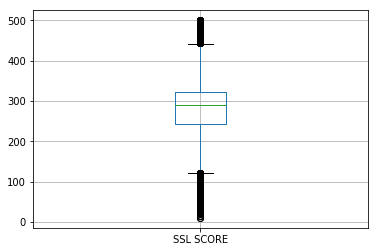

In [35]:
df.boxplot(column="SSL SCORE")

In [36]:
#How do we simply view the "SSL Score" rows?
df["SSL SCORE"]

0         500
1         500
2         500
3         500
4         500
5         500
6         498
7         497
8         495
9         495
10        489
11        488
12        487
13        485
14        483
15        481
16        480
17        476
18        475
19        473
20        472
21        472
22        471
23        471
24        470
25        467
26        467
27        467
28        466
29        463
30        462
31        462
32        460
33        458
34        455
35        455
36        454
37        454
38        453
39        453
40        452
41        450
42        449
43        448
44        447
45        447
46        446
47        446
48        445
49        445
50        445
51        445
52        445
53        444
54        444
55        444
56        444
57        443
58        443
59        443
60        442
61        442
62        440
63        439
64        439
65        439
66        438
67        438
68        438
69        437
70        437
71    

In [37]:
#What about the first fifty rows?
df["SSL SCORE"].head(20)

0     500
1     500
2     500
3     500
4     500
5     500
6     498
7     497
8     495
9     495
10    489
11    488
12    487
13    485
14    483
15    481
16    480
17    476
18    475
19    473
Name: SSL SCORE, dtype: int64

In [38]:
#What about the fifty LOWEST scores?
df["SSL SCORE"].sort_values(ascending=True).head(20)

170919    10
170920    10
170917    14
170918    14
170916    15
170915    19
284064    20
370119    21
204510    23
264420    24
170914    24
277876    25
170913    25
170912    28
189114    28
388168    28
170911    29
170908    30
170909    30
267677    30
Name: SSL SCORE, dtype: int64

In [39]:
#What about SSL Score, Sex Code CD and Race Code CD?
df[["SSL SCORE","SEX CODE CD","RACE CODE CD"]].head()

SSL SCORE SEX CODE CD RACE CODE CD
0        500           M          BLK
1        500           M          WHI
2        500           M          WHI
3        500           M          BLK
4        500           M          BLK

In [40]:
#What are the different race categories?
df["RACE CODE CD"].unique()

array(['BLK', 'WHI', 'WWH', 'API', 'WBH', 'U', 'I'], dtype=object)

In [41]:
#How can we know the counts of each race?
df["RACE CODE CD"].value_counts()


BLK    207842
WWH     99710
WHI     82366
API      4617
WBH      1974
U        1899
I         276
Name: RACE CODE CD, dtype: int64

In [42]:
#sometimes knowing the percentage is more helpful than the raw counts, 
#this is the #of BLK / #total. Why do I need the float? 
float(len(df[df["RACE CODE CD"] == "BLK"]))/len(df["RACE CODE CD"])

0.5213201432713628

In [43]:
#easier way...
df["RACE CODE CD"].value_counts(normalize=True)

BLK   0.521
WWH   0.250
WHI   0.207
API   0.012
WBH   0.005
U     0.005
I     0.001
Name: RACE CODE CD, dtype: float64

In [44]:
df.groupby(by="RACE CODE CD")["SSL SCORE"].describe()

count    mean    std     min     25%     50%     75%     max
RACE CODE CD                                                                  
API            4617.000 269.434 57.873  52.000 232.000 283.000 314.000 430.000
BLK          207842.000 282.426 61.579  10.000 241.000 293.000 326.000 500.000
I               276.000 268.341 52.044 110.000 229.000 276.500 309.250 383.000
U              1899.000 276.682 53.086  39.000 244.000 289.000 317.000 408.000
WBH            1974.000 285.431 55.134  37.000 254.000 293.000 325.000 500.000
WHI           82366.000 269.724 56.697  10.000 230.000 283.000 314.000 500.000
WWH           99710.000 283.268 49.966  34.000 251.000 289.000 320.000 500.000

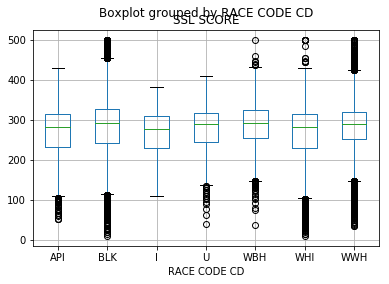

In [45]:
df.boxplot(column="SSL SCORE", by="RACE CODE CD" )

In [47]:
#How many Asian/Pacific Islander males under 20 were victims of shooting incidents?
len(df[(df["RACE CODE CD"]=="API") & (df["SEX CODE CD"]=="M") & (df["PREDICTOR RAT AGE AT LATEST ARREST"]=="less than 20")])

450

In [48]:
#How do we find out how many people on SSL are from the suburbs?
#Give dataframe a list to filter through

burbs = ["SKOKIE","WILMETTE","EVANSTON","DES PLAINES","PALATINE","ARLINGTON HTS","SCHAUMBERG"]

len(df[(df["IDOC RES CITY"].isin(burbs))])

551

In [49]:
df.groupby(by="PREDICTOR RAT AGE AT LATEST ARREST")["SSL SCORE"].describe()

count    mean    std     min     25%  \
PREDICTOR RAT AGE AT LATEST ARREST                                             
20-30                              140357.000 312.393 20.622 264.000 298.000   
30-40                               89165.000 267.988 16.603 220.000 255.000   
40-50                               59082.000 223.435 16.475 174.000 211.000   
50-60                               34528.000 181.235 16.609 129.000 170.000   
60-70                                7824.000 138.755 16.198  82.000 129.000   
70-80                                 995.000  91.637 14.840  53.000  82.000   
less than 20                        66631.000 347.975 23.865 307.000 334.000   

                                       50%     75%     max  
PREDICTOR RAT AGE AT LATEST ARREST                          
20-30                              310.000 321.000 500.000  
30-40                              268.000 278.000 478.000  
40-50                              224.000 234.000 365.000  
50-60                              181.000 192.000 346.000  
60-70                              139.000 147.000 263.000  
70-80                               95.000 101.000 158.000  
less than 20                       342.000 354.000 500.000

In [50]:
#How do we create a column that flags senior citizens with scores over than 250?

def seniors_high_crime(x,y):
    if (x == "70-80") & (y > 250):
        return 1
    elif (x == "70-80") & (y < 250):
        return 0
    elif (x == "60-70") & (y > 250):
        return 1
    elif (x == "60-70") & (y < 250):
        return 0
    else:
        return "other age group"

In [51]:
df["senior_high_crime_flag"] = df.apply(lambda x: seniors_high_crime(x["PREDICTOR RAT AGE AT LATEST ARREST"], x["SSL SCORE"]), axis=1)

In [52]:
df["senior_high_crime_flag"].value_counts()

other age group    389865
0                    8817
1                       2
Name: senior_high_crime_flag, dtype: int64